In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv', encoding='cp1251')

### **Описание датасета.**

**age** - Age of the patient

**sex** - Sex of the patient

**cp** - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

**trtbps** - Resting blood pressure (in mm Hg)

**chol** - Cholestoral in mg/dl fetched via BMI sensor

**fbs** - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

**restecg** - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

**thalachh** - Maximum heart rate achieved

**oldpeak** - Previous peak

**slp** - Slope

**caa** - Number of major vessels

**thall** - Thalium Stress Test result ~ (0,3)

**exng** - Exercise induced angina ~ 1 = Yes, 0 = No

**output** - Target variable

In [4]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### **Уменьшение объема памяти, который занимает датасет.**

In [5]:
print("Размер датасета : ", df.shape)

Размер датасета :  (303, 14)


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.03 MB
Memory usage after optimization is: 0.01 MB
Decreased by 81.8%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int8   
 1   sex       303 non-null    int8   
 2   cp        303 non-null    int8   
 3   trtbps    303 non-null    int16  
 4   chol      303 non-null    int16  
 5   fbs       303 non-null    int8   
 6   restecg   303 non-null    int8   
 7   thalachh  303 non-null    int16  
 8   exng      303 non-null    int8   
 9   oldpeak   303 non-null    float32
 10  slp       303 non-null    int8   
 11  caa       303 non-null    int8   
 12  thall     303 non-null    int8   
 13  output    303 non-null    int8   
dtypes: float32(1), int16(3), int8(10)
memory usage: 6.0 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

###Разделить категориальные переменные и количественные:

In [11]:
categ_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
contin_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [12]:
df[contin_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### **Построим гистограммы, характеризующие количетвенные переменные.**

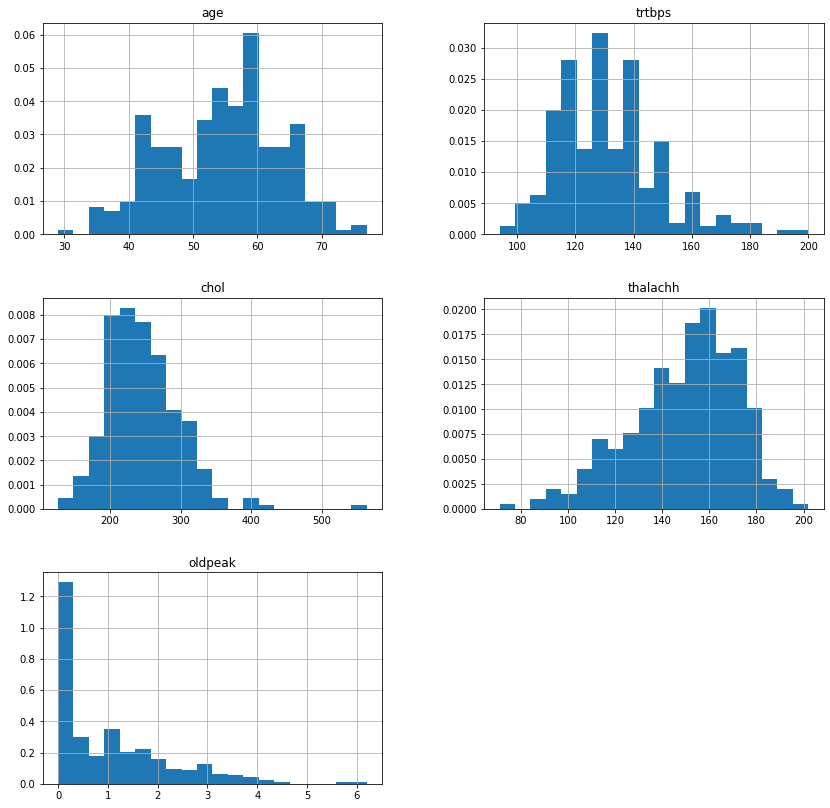

In [13]:
df[contin_cols].hist(figsize=(14,14), density=True, bins=20, grid=True);
#Заметно наличие выбросов в уровнях холестерола, предшествовавших пиках артериального давления.

### **Гистограмма, описывающая целевую переменную.**

[Text(0, 0, 'Low chances of attack(0)'),
 Text(0, 0, 'High chances of attack(1)')]

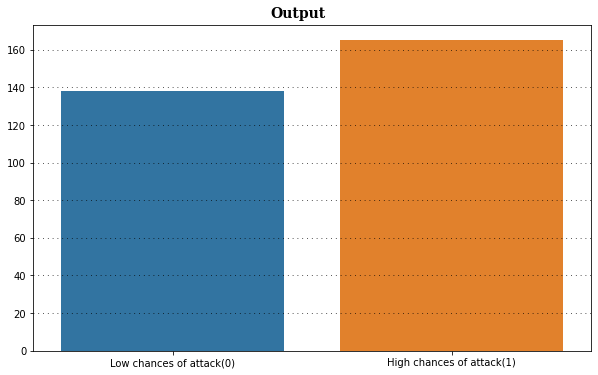

In [14]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot()
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

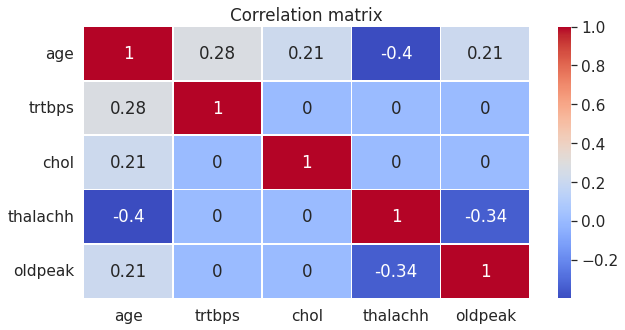

In [15]:
#Создание матрицы корреляций для оценки линейных связей между переменными.
plt.figure(figsize = (10,5))

sns.set(font_scale=1.4)

corr_matrix = df[contin_cols].corr()
corr_matrix = np.round(corr_matrix, 3)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### **Выбросы.**

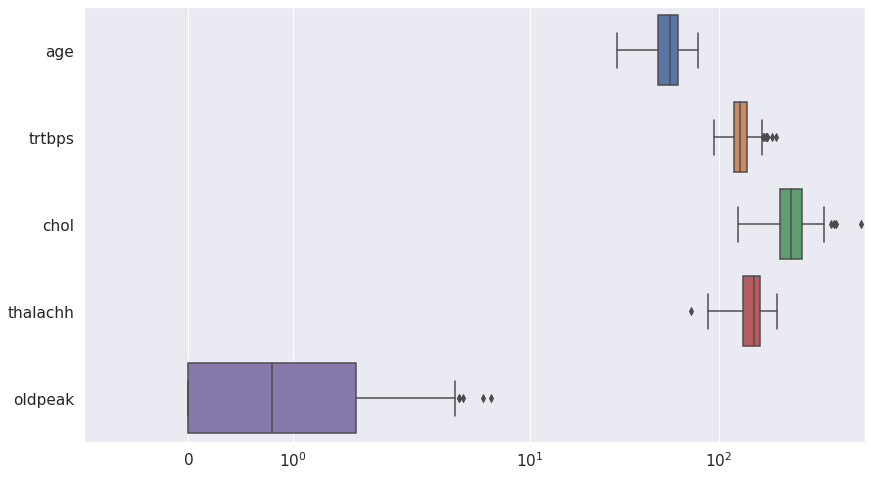

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[contin_cols], orient='h')
plt.xscale('symlog')
plt.xlim(left=-1)
plt.show()

### Рассмотрим подробнее признак, описывающий максимальную частоту сердечных сокращений.






In [17]:
df['thalachh'].var(ddof=1)

524.6464057001726

In [18]:
df['thalachh'].quantile([0.25, 0.5, 0.75])

0.25    133.5
0.50    153.0
0.75    166.0
Name: thalachh, dtype: float64

In [19]:
iqr = df['thalachh'].quantile(0.75) - df['thalachh'].quantile(0.25)
iqr

32.5

In [20]:
boxplot_range = (df['thalachh'].quantile(0.25) - 1.5 * iqr, df['thalachh'].quantile(0.75) + 1.5 * iqr)
boxplot_range

(84.75, 214.75)

In [21]:
outliers = df.loc[(df['thalachh'] < boxplot_range[0]) | (df['thalachh'] > boxplot_range[1])]

outliers.shape[0]

1

In [22]:
outliers.shape[0] / df.shape[0]

0.0033003300330033004

### Рассмотрим связь частоты сердечных сокращений и АД покоя с возрастом:

In [23]:
x2 = df[['thalachh', 'trtbps']].values
y2 = df['age'].values

In [24]:
x2.shape

(303, 2)

In [25]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [26]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x2, y2)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(59.47786243603966, array([ 0.        , -0.15317906,  0.13531934]))